1. 라이브러리 및 경로 준비

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

ROOT_DIR = os.path.abspath('..')
DATA_PATH = os.path.join(ROOT_DIR, 'data', 'processed', 'cleaned_exam_data.csv')
FIGURE_DIR = os.path.join(ROOT_DIR, 'output', 'figures')
os.makedirs(FIGURE_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)
df['시험일_정제'] = pd.to_datetime(df['시험일_정제'], errors='coerce')




2. 요일별 응시자 수 시각화

C:\Users\sbeep\AppData\Local\Temp\ipykernel_6512\69898393.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='요일', order=weekday_order, palette='pastel')


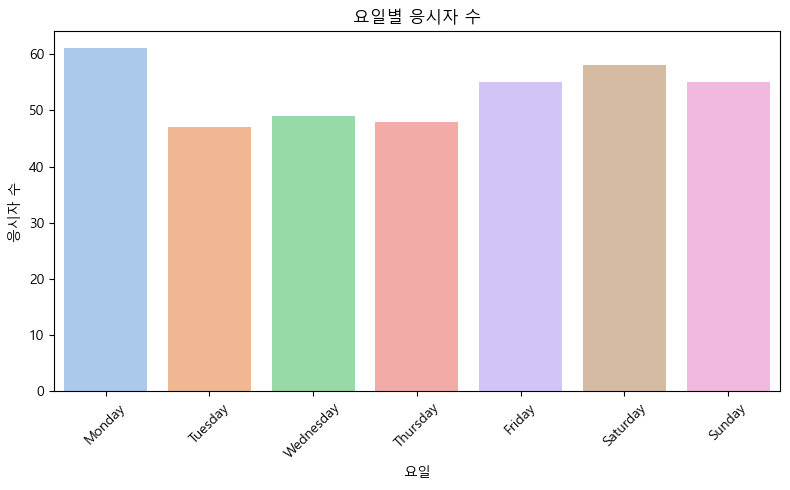

In [24]:
plt.rcParams['font.family'] = 'Malgun Gothic'

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['요일'], categories=weekday_order, ordered=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='요일', order=weekday_order, palette='pastel')
plt.title('요일별 응시자 수')
plt.ylabel('응시자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'weekday_exam_counts.png'))
plt.show()

3. 주차별 응시자 수 시계열 시각화

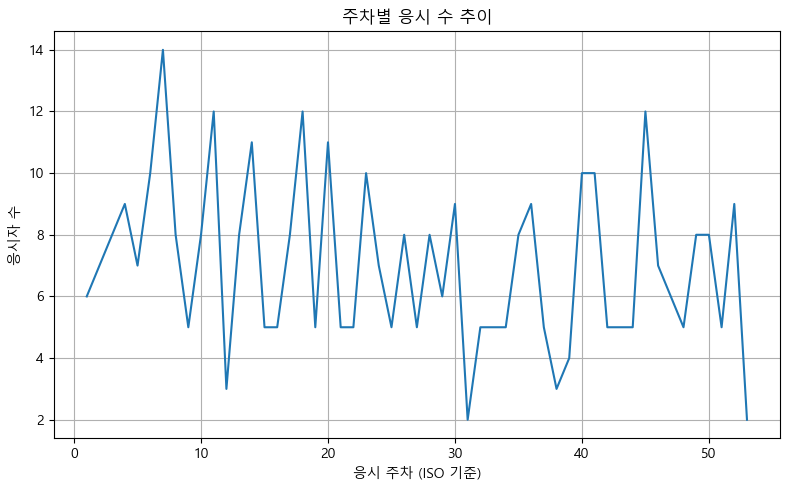

In [25]:
weekly_counts = df['응시_주차'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, markers='o')
plt.title('주차별 응시 수 추이')
plt.xlabel('응시 주차 (ISO 기준)')
plt.ylabel('응시자 수')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'weekly_exam_trend.png'))
plt.show()

4. 시험일 누락 비율 분석

In [18]:
missing_total = df['시험일_정제'].isna().sum()
total_count = len(df)

print(f"시험일 누락 인원: {missing_total}")
print(f"누락률: {missing_total / total_count:.2%}")


시험일 누락 인원: 127
누락률: 25.40%


5. 재응시자 중 누락자 비율 분석

In [20]:
def extract_retake_flag(text):
    if pd.isna(text):
        return 'N'
    text = str(text).lower()
    keywords = ['재응시', 'retake', 're-take', '시험일', 'Retook']
    return 'Y' if any(keyword in text for keyword in keywords) else 'N'

if '비고' in df.columns:
    df['재응시여부'] = df['비고'].apply(extract_retake_flag)
else:
    print("'비고' 칼럼이 없어 재응시 여부를 판단할 수 없습니다.")
    df['재응시여부'] = 'N'

In [21]:
if '재응시여부' in df.columns:
    cond = (df['시험일_정제'].isna()) & (df['재응시여부'] == 'Y')
    missing_retake = df[cond]
    print(f"재응시자 중 시험일 누락 인원: {len(missing_retake)}")

재응시자 중 시험일 누락 인원: 43


6. 응시 누락자 프로파일링

In [26]:
import sys
sys.path.append('../src')

from profile_utils import flag_suspicious_profiles, extract_suspicious_profiles

df = flag_suspicious_profiles(df)

suspicious_df = extract_suspicious_profiles(df)

SUSPICIOUS_PATH = os.path.join(ROOT_DIR, 'output','suspicious_profiles.csv')
suspicious_df.to_csv(SUSPICIOUS_PATH, index=False)

print(f"의심 응시자 {len(suspicious_df)}건 저장 완료 -> {SUSPICIOUS_PATH}")



의심 응시자 35건 저장 완료 -> c:\Users\sbeep\Desktop\DataAnalysis\MIni_Projects\Messy_Score_Lab\output\suspicious_profiles.csv
